In [214]:
import numpy as np
from numpy import random
import random
import matplotlib.pyplot as plt
from scipy.signal import cwt,ricker
from scipy import stats
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.optimizers
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.models import load_model
from tensorflow.keras.layers import Flatten,concatenate,Layer,Dense,LSTM,Activation,MaxPooling2D,Dropout,Conv2D,BatchNormalization,Reshape,UpSampling2D,ZeroPadding2D

In [215]:
random.seed(1314)

def Mean(data):
    return np.mean(data,axis=1)

def Std(data):
    return np.std(data,axis=1)

def Var(data):
    return np.var(data,axis=1)

def Skew(data):
    return stats.skew(data,axis=1)



In [216]:
random_data2 = (np.random.normal(1000,400,200000)).reshape(20000,10,1)
val_data2 = (np.random.normal(1000,400,20000)).reshape(2000,10,1)


In [217]:
mean_data2 = Mean(random_data2)
std_data2 = Std(random_data2)
skew_data2 = Skew(random_data2)

mean_data2v = Mean(val_data2)
std_data2v = Std(val_data2)
skew_data2v = Skew(val_data2)

# Skewness

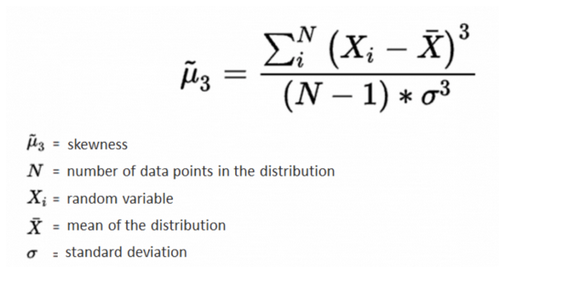

In [218]:
input_layer = keras.Input(shape=(10,1))
x = Flatten()(input_layer)
x = BatchNormalization(axis=1)(x)
# numerator
mean_1 = Dense(64, activation='relu')(x)
mean_2 = Dense(64, activation='relu')(mean_1)
mean_3 = Dense(16, activation='relu')(mean_2)
mean_out = Dense(1, activation = 'linear', name = 'mean')(mean_3)

# denominator
std_1 = Dense(64, activation='relu')(x)
std_2 = Dense(64, activation='relu')(std_1)
std_3 = Dense(32, activation='relu')(std_2)
std_out = Dense(1, activation = 'linear', name = 'std')(std_3)

n_d = tf.keras.layers.Concatenate(axis=1)([mean_out,std_out])
skew1 = Dense(128, activation='relu')(n_d)

skew_out = Dense(1, activation = 'linear', name= 'skewness')(skew1)

skewModel = keras.Model(input_layer, [mean_out,std_out,skew_out ], name= "skew")

In [219]:
skewModel.compile(optimizer="adam", loss="mean_squared_error")
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=10)

In [220]:
skewModel.summary()

Model: "skew"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_36 (InputLayer)          [(None, 10, 1)]      0           []                               
                                                                                                  
 flatten_38 (Flatten)           (None, 10)           0           ['input_36[0][0]']               
                                                                                                  
 batch_normalization_13 (BatchN  (None, 10)          40          ['flatten_38[0][0]']             
 ormalization)                                                                                    
                                                                                                  
 dense_263 (Dense)              (None, 64)           704         ['batch_normalization_13[0][0]

In [221]:
# standard DL

# skewModel = Sequential([
# keras.layers.Flatten(input_shape=(10,1)),
# Dense(128,activation='relu'),
# Dense(128,activation='relu'),
# Dense(64,activation='relu'),
# Dense(64,activation='relu'),           

# Dense(32, activation ='relu'),
# Dense(1, activation ='linear')
# ])

In [222]:

skewModel.fit(random_data2, [mean_data2,std_data2,skew_data2 ], validation_data=([val_data2,[mean_data2v,std_data2v,skew_data2v]]), 
              epochs=1000, batch_size=128,
          #  callbacks=[es],
                shuffle=True)


#skewModel.fit(random_data2, [mean_data2,std_data2,skew_data2 ], epochs=1000, batch_size=128)

Epoch 1/1000
157/157 [==============================] - 2s 4ms/step - loss: 833625.1250 - mean_loss: 755229.7500 - std_loss: 78394.7031 - skewness_loss: 0.8519 - val_loss: 98226.2734 - val_mean_loss: 92774.7422 - val_std_loss: 5450.1475 - val_skewness_loss: 1.3697
Epoch 2/1000
157/157 [==============================] - 0s 2ms/step - loss: 53572.4648 - mean_loss: 52138.4648 - std_loss: 1433.2635 - skewness_loss: 0.7347 - val_loss: 36599.9883 - val_mean_loss: 35679.2031 - val_std_loss: 920.1902 - val_skewness_loss: 0.5946
Epoch 3/1000
157/157 [==============================] - 0s 2ms/step - loss: 29980.3418 - mean_loss: 29132.2148 - std_loss: 847.5498 - skewness_loss: 0.5696 - val_loss: 27968.8418 - val_mean_loss: 27438.0488 - val_std_loss: 530.2435 - val_skewness_loss: 0.5506
Epoch 4/1000
157/157 [==============================] - 0s 2ms/step - loss: 24419.1211 - mean_loss: 23744.6133 - std_loss: 674.0015 - skewness_loss: 0.5059 - val_loss: 22775.3125 - val_mean_loss: 22387.1191 - val_s

157/157 [==============================] - 0s 2ms/step - loss: 626.2900 - mean_loss: 272.2786 - std_loss: 353.4049 - skewness_loss: 0.6063 - val_loss: 128.2675 - val_mean_loss: 40.8377 - val_std_loss: 87.0498 - val_skewness_loss: 0.3800
Epoch 34/1000
157/157 [==============================] - 0s 2ms/step - loss: 704.0295 - mean_loss: 322.8082 - std_loss: 380.5717 - skewness_loss: 0.6496 - val_loss: 126.5340 - val_mean_loss: 35.3787 - val_std_loss: 90.7480 - val_skewness_loss: 0.4073
Epoch 35/1000
157/157 [==============================] - 0s 2ms/step - loss: 587.4371 - mean_loss: 252.4449 - std_loss: 334.4542 - skewness_loss: 0.5383 - val_loss: 138.6211 - val_mean_loss: 50.9224 - val_std_loss: 86.9189 - val_skewness_loss: 0.7798
Epoch 36/1000
157/157 [==============================] - 0s 2ms/step - loss: 647.2067 - mean_loss: 273.7227 - std_loss: 372.9799 - skewness_loss: 0.5043 - val_loss: 201.9705 - val_mean_loss: 119.5515 - val_std_loss: 81.9860 - val_skewness_loss: 0.4330
Epoch 37/

Epoch 66/1000
157/157 [==============================] - 0s 2ms/step - loss: 597.8107 - mean_loss: 236.7178 - std_loss: 360.6199 - skewness_loss: 0.4731 - val_loss: 161.4389 - val_mean_loss: 97.6560 - val_std_loss: 63.2557 - val_skewness_loss: 0.5272
Epoch 67/1000
157/157 [==============================] - 0s 2ms/step - loss: 636.4287 - mean_loss: 261.5737 - std_loss: 374.2681 - skewness_loss: 0.5869 - val_loss: 202.6841 - val_mean_loss: 111.9808 - val_std_loss: 90.3370 - val_skewness_loss: 0.3664
Epoch 68/1000
157/157 [==============================] - 0s 2ms/step - loss: 593.1341 - mean_loss: 227.3027 - std_loss: 365.2483 - skewness_loss: 0.5831 - val_loss: 129.2731 - val_mean_loss: 47.4536 - val_std_loss: 81.3590 - val_skewness_loss: 0.4606
Epoch 69/1000
157/157 [==============================] - 0s 2ms/step - loss: 579.0372 - mean_loss: 238.0027 - std_loss: 340.3839 - skewness_loss: 0.6505 - val_loss: 311.5809 - val_mean_loss: 108.9495 - val_std_loss: 201.9875 - val_skewness_loss: 

Epoch 99/1000
157/157 [==============================] - 0s 2ms/step - loss: 600.7828 - mean_loss: 266.8430 - std_loss: 333.3986 - skewness_loss: 0.5412 - val_loss: 115.5446 - val_mean_loss: 48.4108 - val_std_loss: 66.7232 - val_skewness_loss: 0.4106
Epoch 100/1000
157/157 [==============================] - 0s 2ms/step - loss: 614.5820 - mean_loss: 267.2331 - std_loss: 346.8565 - skewness_loss: 0.4924 - val_loss: 133.4243 - val_mean_loss: 56.1599 - val_std_loss: 76.8291 - val_skewness_loss: 0.4354
Epoch 101/1000
157/157 [==============================] - 0s 2ms/step - loss: 575.3914 - mean_loss: 238.6985 - std_loss: 336.1810 - skewness_loss: 0.5117 - val_loss: 154.4856 - val_mean_loss: 85.6251 - val_std_loss: 68.4699 - val_skewness_loss: 0.3906
Epoch 102/1000
157/157 [==============================] - 0s 2ms/step - loss: 576.1313 - mean_loss: 233.0885 - std_loss: 342.4408 - skewness_loss: 0.6019 - val_loss: 110.8197 - val_mean_loss: 33.2965 - val_std_loss: 77.1002 - val_skewness_loss: 

157/157 [==============================] - 0s 2ms/step - loss: 588.1431 - mean_loss: 252.1915 - std_loss: 335.4083 - skewness_loss: 0.5432 - val_loss: 110.7077 - val_mean_loss: 25.8176 - val_std_loss: 84.5151 - val_skewness_loss: 0.3750
Epoch 132/1000
157/157 [==============================] - 0s 2ms/step - loss: 620.2226 - mean_loss: 298.6448 - std_loss: 321.1583 - skewness_loss: 0.4197 - val_loss: 125.4941 - val_mean_loss: 54.5210 - val_std_loss: 69.8790 - val_skewness_loss: 1.0941
Epoch 133/1000
157/157 [==============================] - 0s 2ms/step - loss: 581.1790 - mean_loss: 255.0123 - std_loss: 325.5482 - skewness_loss: 0.6184 - val_loss: 167.0453 - val_mean_loss: 43.1525 - val_std_loss: 123.4336 - val_skewness_loss: 0.4592
Epoch 134/1000
157/157 [==============================] - 0s 2ms/step - loss: 641.9963 - mean_loss: 278.7483 - std_loss: 362.7519 - skewness_loss: 0.4959 - val_loss: 72.4627 - val_mean_loss: 7.5042 - val_std_loss: 64.5468 - val_skewness_loss: 0.4117
Epoch 13

157/157 [==============================] - 0s 2ms/step - loss: 540.9277 - mean_loss: 227.5070 - std_loss: 312.9398 - skewness_loss: 0.4809 - val_loss: 81.0956 - val_mean_loss: 6.0506 - val_std_loss: 74.6842 - val_skewness_loss: 0.3608
Epoch 164/1000
157/157 [==============================] - 0s 2ms/step - loss: 568.0438 - mean_loss: 223.1405 - std_loss: 344.3358 - skewness_loss: 0.5675 - val_loss: 85.8757 - val_mean_loss: 17.6789 - val_std_loss: 67.5915 - val_skewness_loss: 0.6053
Epoch 165/1000
157/157 [==============================] - 0s 2ms/step - loss: 572.7186 - mean_loss: 235.1104 - std_loss: 337.1381 - skewness_loss: 0.4701 - val_loss: 100.8552 - val_mean_loss: 10.7923 - val_std_loss: 89.6275 - val_skewness_loss: 0.4353
Epoch 166/1000
157/157 [==============================] - 0s 2ms/step - loss: 562.6796 - mean_loss: 223.6168 - std_loss: 338.4717 - skewness_loss: 0.5909 - val_loss: 338.6831 - val_mean_loss: 103.2645 - val_std_loss: 234.5418 - val_skewness_loss: 0.8768
Epoch 16

157/157 [==============================] - 0s 2ms/step - loss: 611.8193 - mean_loss: 274.5266 - std_loss: 336.8115 - skewness_loss: 0.4814 - val_loss: 780.6647 - val_mean_loss: 710.0980 - val_std_loss: 70.1467 - val_skewness_loss: 0.4201
Epoch 196/1000
157/157 [==============================] - 0s 2ms/step - loss: 577.7021 - mean_loss: 261.7263 - std_loss: 315.4858 - skewness_loss: 0.4902 - val_loss: 77.3555 - val_mean_loss: 11.2041 - val_std_loss: 64.6812 - val_skewness_loss: 1.4702
Epoch 197/1000
157/157 [==============================] - 0s 2ms/step - loss: 659.0798 - mean_loss: 294.3800 - std_loss: 364.1701 - skewness_loss: 0.5297 - val_loss: 145.7387 - val_mean_loss: 81.8805 - val_std_loss: 63.3568 - val_skewness_loss: 0.5014
Epoch 198/1000
157/157 [==============================] - 0s 2ms/step - loss: 589.2090 - mean_loss: 270.1681 - std_loss: 318.6075 - skewness_loss: 0.4336 - val_loss: 79.6871 - val_mean_loss: 12.5198 - val_std_loss: 66.7396 - val_skewness_loss: 0.4276
Epoch 19

157/157 [==============================] - 0s 2ms/step - loss: 534.3506 - mean_loss: 211.1378 - std_loss: 322.7325 - skewness_loss: 0.4801 - val_loss: 66.0684 - val_mean_loss: 8.0699 - val_std_loss: 57.5153 - val_skewness_loss: 0.4833
Epoch 228/1000
157/157 [==============================] - 0s 2ms/step - loss: 576.1401 - mean_loss: 250.6287 - std_loss: 325.0726 - skewness_loss: 0.4387 - val_loss: 86.5213 - val_mean_loss: 14.7928 - val_std_loss: 71.0886 - val_skewness_loss: 0.6399
Epoch 229/1000
157/157 [==============================] - 0s 2ms/step - loss: 601.0378 - mean_loss: 290.4759 - std_loss: 310.0319 - skewness_loss: 0.5298 - val_loss: 113.1462 - val_mean_loss: 46.7387 - val_std_loss: 65.9746 - val_skewness_loss: 0.4328
Epoch 230/1000
157/157 [==============================] - 0s 2ms/step - loss: 605.6531 - mean_loss: 287.5489 - std_loss: 317.6938 - skewness_loss: 0.4106 - val_loss: 147.8571 - val_mean_loss: 47.3428 - val_std_loss: 99.4720 - val_skewness_loss: 1.0423
Epoch 231/

Epoch 260/1000
157/157 [==============================] - 0s 2ms/step - loss: 600.9763 - mean_loss: 280.1744 - std_loss: 320.2894 - skewness_loss: 0.5125 - val_loss: 69.5486 - val_mean_loss: 8.9202 - val_std_loss: 59.9546 - val_skewness_loss: 0.6738
Epoch 261/1000
157/157 [==============================] - 0s 2ms/step - loss: 616.3464 - mean_loss: 280.4239 - std_loss: 335.4518 - skewness_loss: 0.4709 - val_loss: 103.5061 - val_mean_loss: 28.0679 - val_std_loss: 73.9974 - val_skewness_loss: 1.4407
Epoch 262/1000
157/157 [==============================] - 0s 2ms/step - loss: 578.8234 - mean_loss: 242.2380 - std_loss: 336.0918 - skewness_loss: 0.4934 - val_loss: 348.6288 - val_mean_loss: 291.7044 - val_std_loss: 56.5637 - val_skewness_loss: 0.3607
Epoch 263/1000
157/157 [==============================] - 0s 2ms/step - loss: 531.3622 - mean_loss: 216.7166 - std_loss: 314.1537 - skewness_loss: 0.4919 - val_loss: 162.5435 - val_mean_loss: 40.1671 - val_std_loss: 121.7429 - val_skewness_loss:

157/157 [==============================] - 0s 2ms/step - loss: 582.2750 - mean_loss: 262.5109 - std_loss: 319.2638 - skewness_loss: 0.5003 - val_loss: 78.7489 - val_mean_loss: 15.0998 - val_std_loss: 63.2878 - val_skewness_loss: 0.3613
Epoch 293/1000
157/157 [==============================] - 0s 2ms/step - loss: 593.6392 - mean_loss: 273.1096 - std_loss: 320.0931 - skewness_loss: 0.4366 - val_loss: 136.5288 - val_mean_loss: 73.5017 - val_std_loss: 62.5685 - val_skewness_loss: 0.4587
Epoch 294/1000
157/157 [==============================] - 0s 2ms/step - loss: 691.0458 - mean_loss: 370.0397 - std_loss: 320.5276 - skewness_loss: 0.4783 - val_loss: 107.4359 - val_mean_loss: 54.0261 - val_std_loss: 53.0493 - val_skewness_loss: 0.3604
Epoch 295/1000
157/157 [==============================] - 0s 2ms/step - loss: 660.7979 - mean_loss: 317.5723 - std_loss: 342.7821 - skewness_loss: 0.4436 - val_loss: 191.4403 - val_mean_loss: 126.2779 - val_std_loss: 64.5102 - val_skewness_loss: 0.6522
Epoch 2

Epoch 325/1000
157/157 [==============================] - 0s 2ms/step - loss: 537.9301 - mean_loss: 229.0060 - std_loss: 308.3841 - skewness_loss: 0.5398 - val_loss: 94.2737 - val_mean_loss: 37.1583 - val_std_loss: 56.7266 - val_skewness_loss: 0.3888
Epoch 326/1000
157/157 [==============================] - 0s 2ms/step - loss: 547.1335 - mean_loss: 210.8566 - std_loss: 335.7464 - skewness_loss: 0.5306 - val_loss: 107.5408 - val_mean_loss: 30.4999 - val_std_loss: 76.6274 - val_skewness_loss: 0.4135
Epoch 327/1000
157/157 [==============================] - 0s 2ms/step - loss: 565.5925 - mean_loss: 224.3626 - std_loss: 340.7542 - skewness_loss: 0.4757 - val_loss: 73.8611 - val_mean_loss: 20.4547 - val_std_loss: 52.6650 - val_skewness_loss: 0.7414
Epoch 328/1000
157/157 [==============================] - 0s 2ms/step - loss: 585.6153 - mean_loss: 241.3828 - std_loss: 343.7990 - skewness_loss: 0.4337 - val_loss: 108.9451 - val_mean_loss: 22.2476 - val_std_loss: 86.3378 - val_skewness_loss: 0

157/157 [==============================] - 0s 2ms/step - loss: 562.4289 - mean_loss: 240.1407 - std_loss: 321.7979 - skewness_loss: 0.4902 - val_loss: 83.4768 - val_mean_loss: 22.5255 - val_std_loss: 60.2613 - val_skewness_loss: 0.6900
Epoch 358/1000
157/157 [==============================] - 0s 2ms/step - loss: 611.9760 - mean_loss: 296.9376 - std_loss: 314.5155 - skewness_loss: 0.5228 - val_loss: 78.3660 - val_mean_loss: 16.1395 - val_std_loss: 61.8650 - val_skewness_loss: 0.3616
Epoch 359/1000
157/157 [==============================] - 0s 2ms/step - loss: 624.3851 - mean_loss: 280.0664 - std_loss: 343.8237 - skewness_loss: 0.4950 - val_loss: 88.5885 - val_mean_loss: 10.9428 - val_std_loss: 77.2830 - val_skewness_loss: 0.3628
Epoch 360/1000
157/157 [==============================] - 0s 2ms/step - loss: 542.4362 - mean_loss: 216.7217 - std_loss: 325.2402 - skewness_loss: 0.4744 - val_loss: 66.2254 - val_mean_loss: 13.6723 - val_std_loss: 51.6322 - val_skewness_loss: 0.9210
Epoch 361/1

Epoch 390/1000
157/157 [==============================] - 0s 2ms/step - loss: 620.2930 - mean_loss: 272.4189 - std_loss: 347.3966 - skewness_loss: 0.4774 - val_loss: 71.7918 - val_mean_loss: 13.6851 - val_std_loss: 57.2555 - val_skewness_loss: 0.8512
Epoch 391/1000
157/157 [==============================] - 0s 2ms/step - loss: 559.5553 - mean_loss: 257.6490 - std_loss: 301.4492 - skewness_loss: 0.4571 - val_loss: 104.5229 - val_mean_loss: 49.0078 - val_std_loss: 55.0425 - val_skewness_loss: 0.4726
Epoch 392/1000
157/157 [==============================] - 0s 2ms/step - loss: 553.2665 - mean_loss: 238.5699 - std_loss: 314.2519 - skewness_loss: 0.4448 - val_loss: 230.1740 - val_mean_loss: 178.4590 - val_std_loss: 51.3493 - val_skewness_loss: 0.3658
Epoch 393/1000
157/157 [==============================] - 0s 2ms/step - loss: 528.0773 - mean_loss: 216.2090 - std_loss: 311.3650 - skewness_loss: 0.5034 - val_loss: 83.1131 - val_mean_loss: 24.5258 - val_std_loss: 58.2184 - val_skewness_loss: 

157/157 [==============================] - 0s 2ms/step - loss: 581.0441 - mean_loss: 253.5794 - std_loss: 327.0637 - skewness_loss: 0.4010 - val_loss: 96.9658 - val_mean_loss: 23.5865 - val_std_loss: 72.9979 - val_skewness_loss: 0.3814
Epoch 423/1000
157/157 [==============================] - 0s 2ms/step - loss: 586.7100 - mean_loss: 263.5402 - std_loss: 322.6566 - skewness_loss: 0.5132 - val_loss: 104.6424 - val_mean_loss: 5.8751 - val_std_loss: 98.3671 - val_skewness_loss: 0.4002
Epoch 424/1000
157/157 [==============================] - 0s 2ms/step - loss: 590.3272 - mean_loss: 247.0186 - std_loss: 342.9155 - skewness_loss: 0.3931 - val_loss: 127.8308 - val_mean_loss: 21.6912 - val_std_loss: 105.6365 - val_skewness_loss: 0.5031
Epoch 425/1000
157/157 [==============================] - 0s 2ms/step - loss: 643.1185 - mean_loss: 306.5040 - std_loss: 336.1655 - skewness_loss: 0.4489 - val_loss: 125.3453 - val_mean_loss: 64.5324 - val_std_loss: 59.8953 - val_skewness_loss: 0.9176
Epoch 42

Epoch 455/1000
157/157 [==============================] - 0s 2ms/step - loss: 627.6584 - mean_loss: 294.5880 - std_loss: 332.6197 - skewness_loss: 0.4509 - val_loss: 67.3630 - val_mean_loss: 12.0500 - val_std_loss: 54.3143 - val_skewness_loss: 0.9988
Epoch 456/1000
157/157 [==============================] - 0s 2ms/step - loss: 574.9191 - mean_loss: 255.8112 - std_loss: 318.6025 - skewness_loss: 0.5053 - val_loss: 88.4536 - val_mean_loss: 18.6773 - val_std_loss: 69.1777 - val_skewness_loss: 0.5987
Epoch 457/1000
157/157 [==============================] - 0s 2ms/step - loss: 614.2994 - mean_loss: 281.4741 - std_loss: 332.4041 - skewness_loss: 0.4212 - val_loss: 105.2009 - val_mean_loss: 50.0840 - val_std_loss: 54.7326 - val_skewness_loss: 0.3843
Epoch 458/1000
157/157 [==============================] - 0s 2ms/step - loss: 584.9316 - mean_loss: 266.6159 - std_loss: 317.7870 - skewness_loss: 0.5286 - val_loss: 173.5232 - val_mean_loss: 102.6974 - val_std_loss: 70.3374 - val_skewness_loss: 

157/157 [==============================] - 0s 2ms/step - loss: 614.6064 - mean_loss: 268.6057 - std_loss: 345.5783 - skewness_loss: 0.4223 - val_loss: 148.8091 - val_mean_loss: 9.6501 - val_std_loss: 138.5438 - val_skewness_loss: 0.6153
Epoch 488/1000
157/157 [==============================] - 0s 2ms/step - loss: 566.6038 - mean_loss: 235.0302 - std_loss: 331.0897 - skewness_loss: 0.4840 - val_loss: 117.9601 - val_mean_loss: 58.8919 - val_std_loss: 58.7063 - val_skewness_loss: 0.3618
Epoch 489/1000
157/157 [==============================] - 0s 2ms/step - loss: 556.9515 - mean_loss: 231.0787 - std_loss: 325.4228 - skewness_loss: 0.4501 - val_loss: 156.7042 - val_mean_loss: 35.2132 - val_std_loss: 120.9531 - val_skewness_loss: 0.5378
Epoch 490/1000
157/157 [==============================] - 0s 2ms/step - loss: 598.9078 - mean_loss: 253.2570 - std_loss: 345.2399 - skewness_loss: 0.4109 - val_loss: 69.5456 - val_mean_loss: 16.5952 - val_std_loss: 52.5843 - val_skewness_loss: 0.3661
Epoch 4

157/157 [==============================] - 0s 2ms/step - loss: 607.5464 - mean_loss: 294.5262 - std_loss: 312.4958 - skewness_loss: 0.5243 - val_loss: 122.8845 - val_mean_loss: 52.2810 - val_std_loss: 70.2351 - val_skewness_loss: 0.3684
Epoch 520/1000
157/157 [==============================] - 0s 2ms/step - loss: 559.7996 - mean_loss: 234.9145 - std_loss: 324.5062 - skewness_loss: 0.3791 - val_loss: 336.6431 - val_mean_loss: 283.7260 - val_std_loss: 52.3612 - val_skewness_loss: 0.5559
Epoch 521/1000
157/157 [==============================] - 0s 2ms/step - loss: 585.8612 - mean_loss: 256.1117 - std_loss: 329.3282 - skewness_loss: 0.4215 - val_loss: 480.3536 - val_mean_loss: 426.4600 - val_std_loss: 53.5267 - val_skewness_loss: 0.3670
Epoch 522/1000
157/157 [==============================] - 0s 2ms/step - loss: 636.7239 - mean_loss: 314.4984 - std_loss: 321.7894 - skewness_loss: 0.4359 - val_loss: 81.2001 - val_mean_loss: 17.0316 - val_std_loss: 63.7890 - val_skewness_loss: 0.3794
Epoch 

Epoch 552/1000
157/157 [==============================] - 0s 2ms/step - loss: 534.3908 - mean_loss: 221.9939 - std_loss: 312.0038 - skewness_loss: 0.3931 - val_loss: 92.8613 - val_mean_loss: 14.6335 - val_std_loss: 77.8630 - val_skewness_loss: 0.3648
Epoch 553/1000
157/157 [==============================] - 0s 2ms/step - loss: 583.1934 - mean_loss: 237.3848 - std_loss: 345.3899 - skewness_loss: 0.4187 - val_loss: 74.5495 - val_mean_loss: 24.6519 - val_std_loss: 49.5358 - val_skewness_loss: 0.3618
Epoch 554/1000
157/157 [==============================] - 0s 2ms/step - loss: 642.6682 - mean_loss: 276.5402 - std_loss: 365.6925 - skewness_loss: 0.4357 - val_loss: 136.2623 - val_mean_loss: 79.1683 - val_std_loss: 56.5134 - val_skewness_loss: 0.5805
Epoch 555/1000
157/157 [==============================] - 0s 2ms/step - loss: 573.2564 - mean_loss: 259.4178 - std_loss: 313.3642 - skewness_loss: 0.4744 - val_loss: 79.0495 - val_mean_loss: 5.7481 - val_std_loss: 72.7881 - val_skewness_loss: 0.5

157/157 [==============================] - 0s 2ms/step - loss: 561.7899 - mean_loss: 236.5685 - std_loss: 324.7911 - skewness_loss: 0.4301 - val_loss: 220.2934 - val_mean_loss: 123.3266 - val_std_loss: 96.2550 - val_skewness_loss: 0.7118
Epoch 585/1000
157/157 [==============================] - 0s 2ms/step - loss: 554.6920 - mean_loss: 238.5950 - std_loss: 315.6689 - skewness_loss: 0.4281 - val_loss: 90.4273 - val_mean_loss: 26.2819 - val_std_loss: 63.7474 - val_skewness_loss: 0.3980
Epoch 586/1000
157/157 [==============================] - 0s 2ms/step - loss: 511.5999 - mean_loss: 210.5174 - std_loss: 300.6577 - skewness_loss: 0.4249 - val_loss: 65.1901 - val_mean_loss: 9.8063 - val_std_loss: 55.0212 - val_skewness_loss: 0.3627
Epoch 587/1000
157/157 [==============================] - 0s 2ms/step - loss: 554.8303 - mean_loss: 222.0847 - std_loss: 332.3435 - skewness_loss: 0.4021 - val_loss: 72.7480 - val_mean_loss: 24.5465 - val_std_loss: 47.7003 - val_skewness_loss: 0.5012
Epoch 588/

Epoch 617/1000
157/157 [==============================] - 0s 2ms/step - loss: 580.7408 - mean_loss: 263.7647 - std_loss: 316.5609 - skewness_loss: 0.4152 - val_loss: 137.7740 - val_mean_loss: 40.9959 - val_std_loss: 96.3954 - val_skewness_loss: 0.3827
Epoch 618/1000
157/157 [==============================] - 0s 2ms/step - loss: 518.9841 - mean_loss: 207.9176 - std_loss: 310.6558 - skewness_loss: 0.4107 - val_loss: 127.2203 - val_mean_loss: 49.3491 - val_std_loss: 77.5066 - val_skewness_loss: 0.3646
Epoch 619/1000
157/157 [==============================] - 0s 2ms/step - loss: 581.7191 - mean_loss: 243.7233 - std_loss: 337.5616 - skewness_loss: 0.4342 - val_loss: 88.0243 - val_mean_loss: 16.5451 - val_std_loss: 71.1004 - val_skewness_loss: 0.3787
Epoch 620/1000
157/157 [==============================] - 0s 2ms/step - loss: 571.1847 - mean_loss: 236.8214 - std_loss: 333.9286 - skewness_loss: 0.4345 - val_loss: 104.9240 - val_mean_loss: 53.5823 - val_std_loss: 50.9814 - val_skewness_loss: 

157/157 [==============================] - 0s 2ms/step - loss: 548.2983 - mean_loss: 225.3149 - std_loss: 322.5715 - skewness_loss: 0.4120 - val_loss: 63.9681 - val_mean_loss: 13.2212 - val_std_loss: 50.3675 - val_skewness_loss: 0.3794
Epoch 650/1000
157/157 [==============================] - 0s 2ms/step - loss: 630.5955 - mean_loss: 302.4540 - std_loss: 327.7413 - skewness_loss: 0.4002 - val_loss: 87.8714 - val_mean_loss: 7.6096 - val_std_loss: 79.8472 - val_skewness_loss: 0.4146
Epoch 651/1000
157/157 [==============================] - 0s 2ms/step - loss: 579.8135 - mean_loss: 259.4903 - std_loss: 319.9373 - skewness_loss: 0.3860 - val_loss: 61.6330 - val_mean_loss: 11.5619 - val_std_loss: 49.7007 - val_skewness_loss: 0.3704
Epoch 652/1000
157/157 [==============================] - 0s 3ms/step - loss: 579.4058 - mean_loss: 262.7548 - std_loss: 316.2479 - skewness_loss: 0.4032 - val_loss: 86.5088 - val_mean_loss: 35.8203 - val_std_loss: 50.2856 - val_skewness_loss: 0.4029
Epoch 653/10

KeyboardInterrupt: 

1/1 [==============================] - 0s 25ms/step


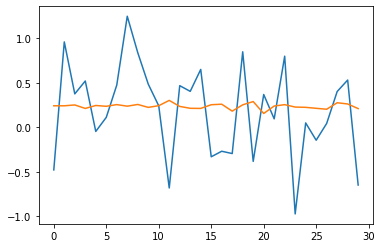

In [226]:
Predirect_arr2 = (np.random.normal(1000,400,300)).reshape(30,10,1)
# plt.plot(range(30),Skew(Predirect_arr2),range(30), skewModel.predict(Predirect_arr2))

#plt.plot(range(30),np.mean(Predirect_arr2, axis=1),range(30), skewModel.predict(Predirect_arr2)[0])
#plt.plot(range(30),np.std(Predirect_arr2, axis=1),range(30), skewModel.predict(Predirect_arr2)[1])

plt.plot(range(30),Skew(Predirect_arr2),range(30), skewModel.predict(Predirect_arr2)[2])

In [227]:
skewModel.save("./skew1.h5")